# Comparing various models on NYC taxi data set
The dataset is sourced from [NAB](https://github.com/numenta/NAB)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [2]:
train_df = pd.read_csv("../data/nyc_taxi.csv")
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df.set_index(train_df['timestamp'], inplace=True)
train_df['hour'] = train_df.index.hour
train_df['day_of_week'] = train_df.index.dayofweek
train_df['week_of_year'] = train_df.index.isocalendar().week
train_df['month'] = train_df.index.month

matrix = train_df[['value', 'hour', 'day_of_week', 'week_of_year', 'month']]

In [3]:
model_if = IsolationForest(n_estimators=100,contamination=0.05,random_state=42)
model_if.fit(matrix)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",100
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.05
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [4]:
model_lof = LocalOutlierFactor(n_neighbors=5, contamination=0.05)
model_lof.fit(matrix)


,"n_neighbors n_neighbors: int, default=20Number of neighbors to use by default for :meth:`kneighbors` queries.If n_neighbors is larger than the number of samples provided,all samples will be used.",5
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf is size passed to :class:`BallTree` or :class:`KDTree`. This canaffect the speed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"p p: float, default=2Parameter for the Minkowski metric from:func:`sklearn.metrics.pairwise_distances`. When p = 1, thisis equivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. When fitting this is used to define thethreshold on the scores of the samples.- if 'auto', the threshold is determined as in the original paper,- if a float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.05
,"novelty novelty: bool, default=FalseBy default, LocalOutlierFactor is only meant to be used for outlierdetection (novelty=False). Set novelty to True if you want to useLocalOutlierFactor for novelty detection. In this case be aware thatyou should only use predict, decision_function and score_sampleson new unseen data and not on the training set; and note that theresults obtained this way may differ from the standard LOF results... versionadded:: 0.20",False
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [5]:
model_ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='scale')
model_ocsvm.fit(matrix)


,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"nu nu: float, default=0.5An upper bound on the fraction of trainingerrors and a lower bound of the fraction of supportvectors. Should be in the interval (0, 1]. By default 0.5will be taken.",0.05
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


In [ ]:
# Isolation Forest
train_df['anomaly_if'] = model_if.fit_predict(train_df[['value']])
train_df['label_if'] = train_df['anomaly_if'].map({1: 'Normal', -1: 'Anomaly'})
train_df['score_if'] = model_if.decision_function(train_df[['value']])

# Local Outlier Factor
train_df['anomaly_lof'] = model_lof.fit_predict(train_df[['value']])
train_df['label_lof'] = train_df['anomaly_lof'].map({1: 'Normal', -1: 'Anomaly'})
train_df['score_lof'] = model_lof.negative_outlier_factor_

# One-Class SVM
train_df['anomaly_ocsvm'] = model_ocsvm.fit_predict(train_df[['value']])
train_df['label_ocsvm'] = train_df['anomaly_ocsvm'].map({1: 'Normal', -1: 'Anomaly'})
train_df['score_ocsvm'] = model_ocsvm.decision_function(train_df[['value']])

d:\anomlay detection\myenv\Lib\site-packages\sklearn\neighbors\_lof.py:325: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


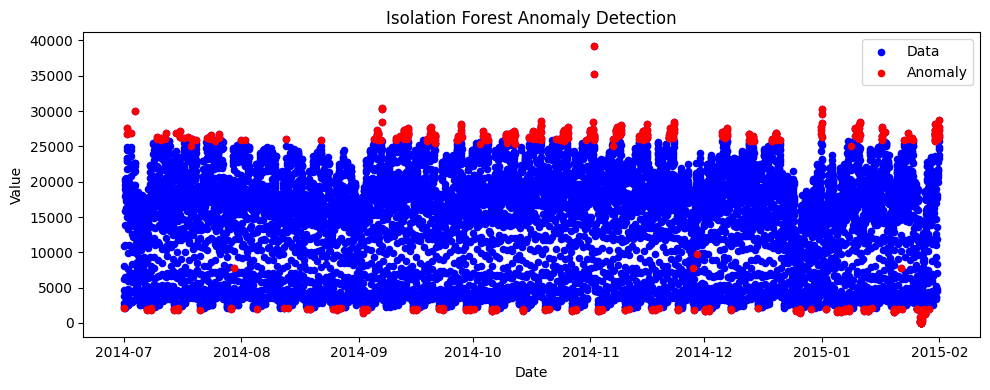

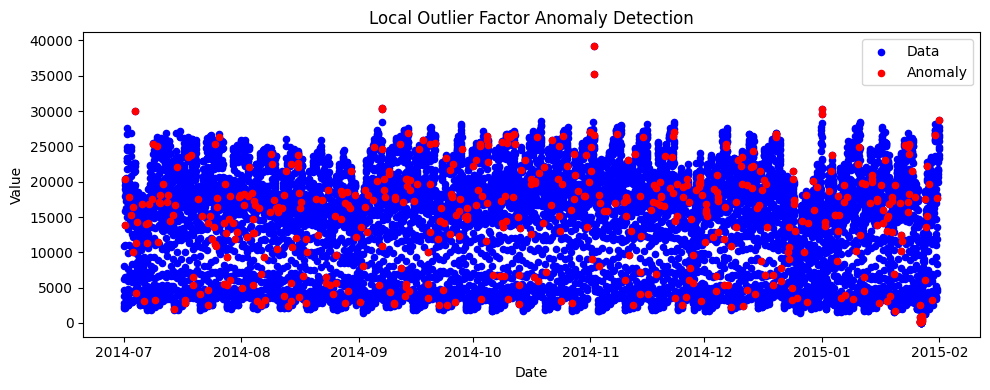

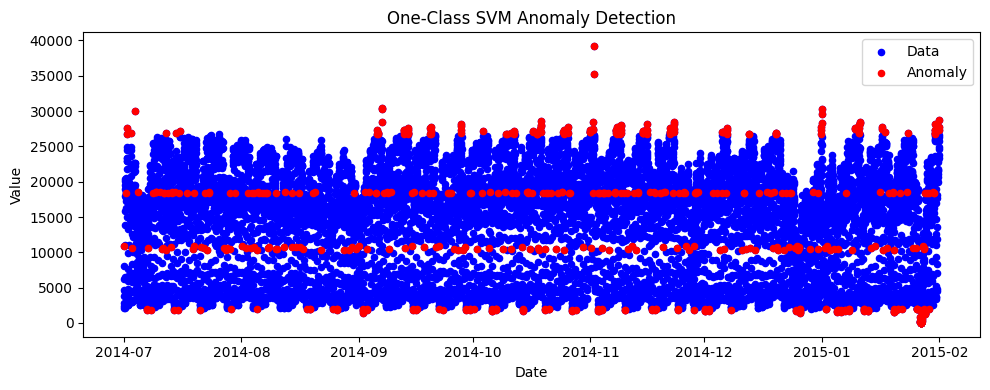

In [7]:
# Isolation Forest
plt.figure(figsize=(10, 4))
plt.scatter(train_df.index, train_df['value'], color='blue', label='Data', s=20)
plt.scatter(
    train_df.loc[train_df['anomaly_if'] == -1].index,
    train_df.loc[train_df['anomaly_if'] == -1, 'value'], color='red', label='Anomaly', s=20
)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.tight_layout()
plt.show()

# Local Outlier Factor
plt.figure(figsize=(10, 4))
plt.scatter(train_df.index, train_df['value'], color='blue', label='Data', s=20)
plt.scatter(
    train_df.loc[train_df['anomaly_lof'] == -1].index,
    train_df.loc[train_df['anomaly_lof'] == -1, 'value'], color='red', label='Anomaly', s=20
)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Local Outlier Factor Anomaly Detection')
plt.legend()
plt.tight_layout()
plt.show()

# One-Class SVM
plt.figure(figsize=(10, 4))
plt.scatter(train_df.index, train_df['value'], color='blue', label='Data', s=20)
plt.scatter(
    train_df.loc[train_df['anomaly_ocsvm'] == -1].index,
    train_df.loc[train_df['anomaly_ocsvm'] == -1, 'value'], color='red', label='Anomaly', s=20
)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('One-Class SVM Anomaly Detection')
plt.legend()
plt.tight_layout()
plt.show()
